In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv(r'C:\Users\admin\Downloads\CC GENERAL.csv')

In [4]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['Species']=le.fit_transform(df['Species'])

In [7]:
df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median(),inplace=True)
df['CREDIT_LIMIT'].fillna(df['CREDIT_LIMIT'].median(),inplace=True)


In [8]:
df.isna().apply(pd.value_counts).T

,False
CUST_ID,8950
BALANCE,8950
BALANCE_FREQUENCY,8950
PURCHASES,8950
ONEOFF_PURCHASES,8950
INSTALLMENTS_PURCHASES,8950
CASH_ADVANCE,8950
PURCHASES_FREQUENCY,8950
ONEOFF_PURCHASES_FREQUENCY,8950
PURCHASES_INSTALLMENTS_FREQUENCY,8950


In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
std=StandardScaler()

In [11]:
from sklearn.cluster import KMeans

In [12]:
df_std=df.drop('CUST_ID',axis=1)

In [13]:
df_std=std.fit_transform(df_std)

In [14]:
df_std

array([[-0.73198937, -0.24943448, -0.42489974, ..., -0.3024    ,
        -0.52555097,  0.36067954],
       [ 0.78696085,  0.13432467, -0.46955188, ...,  0.09749953,
         0.2342269 ,  0.36067954],
       [ 0.44713513,  0.51808382, -0.10766823, ..., -0.0932934 ,
        -0.52555097,  0.36067954],
       ...,
       [-0.7403981 , -0.18547673, -0.40196519, ..., -0.32687479,
         0.32919999, -4.12276757],
       [-0.74517423, -0.18547673, -0.46955188, ..., -0.33830497,
         0.32919999, -4.12276757],
       [-0.57257511, -0.88903307,  0.04214581, ..., -0.3243581 ,
        -0.52555097, -4.12276757]])

In [15]:
from sklearn.decomposition import PCA

In [16]:
pca=PCA(n_components=2)

In [17]:
pca1=pca.fit_transform(df_std)

In [18]:
df_decomposed=pd.DataFrame(pca1)

In [19]:
df_decomposed.head()

,0,1
0,-1.683657,-1.072225
1,-1.134105,2.509170
2,0.969361,-0.383416
3,-0.888218,0.004615
4,-1.600029,-0.683772


In [20]:
kmeans=KMeans(n_clusters=4)

In [21]:
kmeans.fit(df_std)

KMeans(n_clusters=4)

In [22]:
kmeans.labels_

array([0, 2, 1, ..., 1, 0, 0])

In [23]:
df['Cluster']=kmeans.labels_

In [24]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'Cluster'],
      dtype='object')

In [27]:
df1=df.drop(['CUST_ID', 'BALANCE',
       'ONEOFF_PURCHASES','CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],axis=1)

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

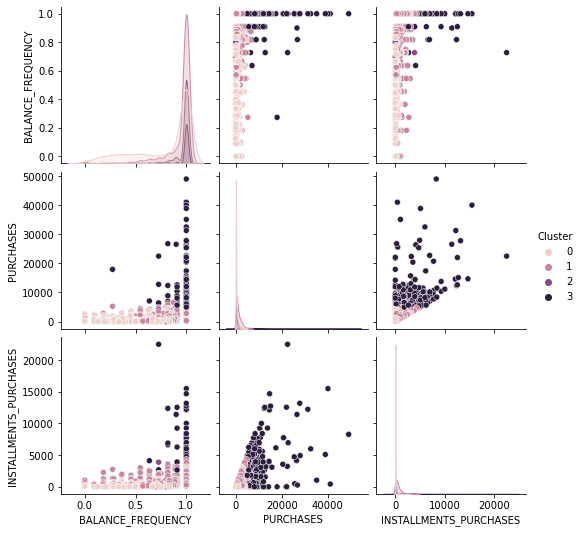

In [30]:
sns.pairplot(df1,hue='Cluster')